In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import datetime as dt

In [61]:
df2021=pd.read_csv('01. Oct-2021 - Dec-2021.csv')
df2022_2023=pd.read_csv('00. Jan-2022 - Jun-2023.csv')

In [62]:
df2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42747 entries, 0 to 42746
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Campaign                      42746 non-null  object 
 1   Insertion Order               42746 non-null  object 
 2   Line Item                     42735 non-null  object 
 3   Date                          42735 non-null  object 
 4   Country                       42735 non-null  object 
 5   Media Type                    42735 non-null  object 
 6   Creative                      42735 non-null  object 
 7   Impressions                   42736 non-null  float64
 8   Clicks                        42736 non-null  float64
 9   Total Conversions             42736 non-null  float64
 10  First-Quartile Views (Video)  42736 non-null  float64
 11  Midpoint Views (Video)        42736 non-null  float64
 12  Third-Quartile Views (Video)  42736 non-null  float64
 13  C

In [63]:
df2022_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140011 entries, 0 to 140010
Data columns (total 16 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Campaign                      140011 non-null  object 
 1   Insertion Order               140011 non-null  object 
 2   Line Item                     140011 non-null  object 
 3   Date                          140011 non-null  object 
 4   Country                       140011 non-null  object 
 5   Media Type                    140011 non-null  object 
 6   Creative                      140011 non-null  object 
 7   Impressions                   140011 non-null  int64  
 8   Clicks                        140011 non-null  int64  
 9   Total Conversions             140011 non-null  int64  
 10  First-Quartile Views (Video)  140011 non-null  int64  
 11  Midpoint Views (Video)        140011 non-null  int64  
 12  Third-Quartile Views (Video)  140011 non-nul

In [64]:
df2022_2023['Date']

0         01/01/2022
1         01/01/2022
2         01/01/2022
3         01/01/2022
4         01/01/2022
             ...    
140006    01/06/2023
140007    01/06/2023
140008    01/06/2023
140009    01/06/2023
140010    01/06/2023
Name: Date, Length: 140011, dtype: object

In [65]:
df2022_2023['Date'] = pd.to_datetime(df2022_2023['Date'], format='%d/%m/%Y')
df2022_2023['Date'] = df2022_2023['Date'].dt.strftime('%Y-%m-%d')
df2022_2023=df2022_2023.sort_values(by=['Date'])
df2022_2023['Date']

0         2022-01-01
102       2022-01-01
101       2022-01-01
100       2022-01-01
99        2022-01-01
             ...    
136101    2023-06-30
137648    2023-06-30
137649    2023-06-30
137872    2023-06-30
137647    2023-06-30
Name: Date, Length: 140011, dtype: object

In [66]:
df2021['Date'].nunique()

87

In [67]:
df2021['Date']

0        2021/12/28
1        2021/12/28
2        2021/12/28
3        2021/12/28
4        2021/12/29
            ...    
42742           NaN
42743           NaN
42744           NaN
42745           NaN
42746           NaN
Name: Date, Length: 42747, dtype: object

In [68]:
df2021=df2021.dropna(subset=['Line Item'])

In [69]:
df2021['Date']=df2021['Date'].astype('datetime64[ns]')


In [70]:
df= pd.concat([df2022_2023, df2021], ignore_index=True)


In [71]:
df['Date']=df['Date'].astype('datetime64[ns]')
df=df.sort_values(by=['Date'])
df.reset_index(drop=True, inplace=True)


In [72]:
df.shape

(182746, 16)

In [74]:

mask_1 = df['Impressions'] < df['Clicks']
df= df[~mask_1]
mask_2 = (df['Media Cost (USD)'] == 0) & (df['Impressions'] > 0)
df= df[~mask_2]

df.reset_index(drop=True, inplace=True)
df.shape

(182277, 16)

## Simple scatter plotting

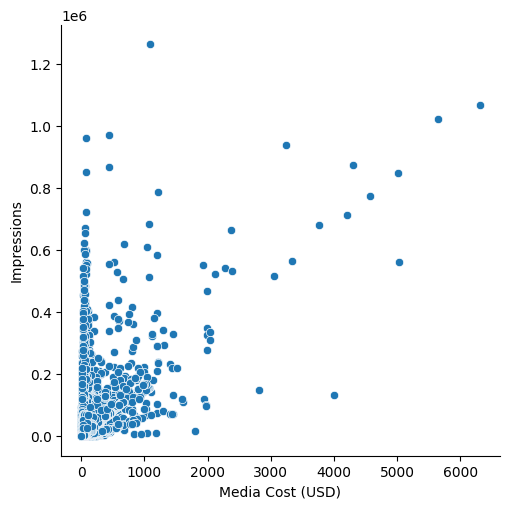

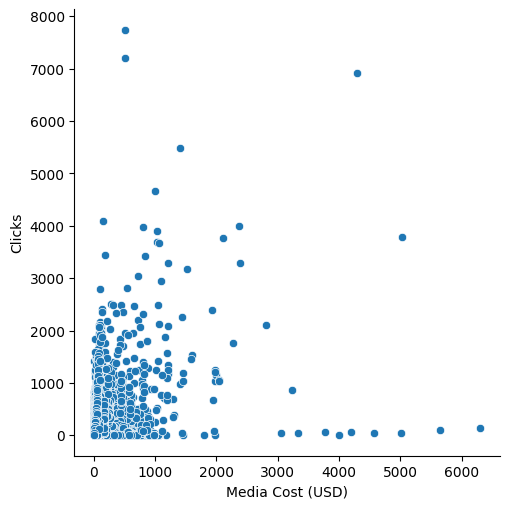

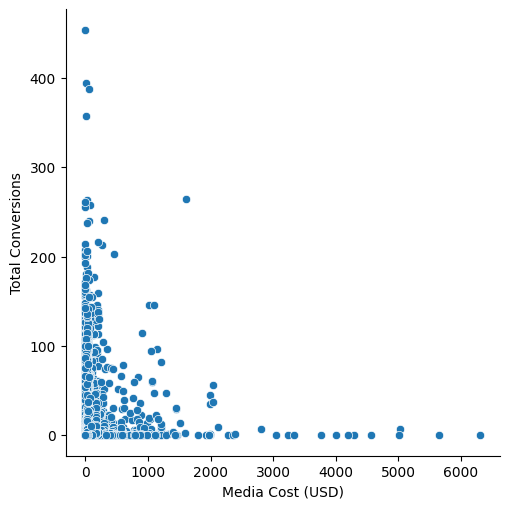

In [75]:
cols=['Impressions', 'Clicks', 'Total Conversions']
for c in cols:
    sns.relplot(x='Media Cost (USD)', y=c, kind='scatter', data=df)
    plt.show()

## Correlation

/var/folders/p5/9npcw21d3xs054yxn9xh232h0000gn/T/ipykernel_27697/1101342614.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


NameError: name 'k' is not defined

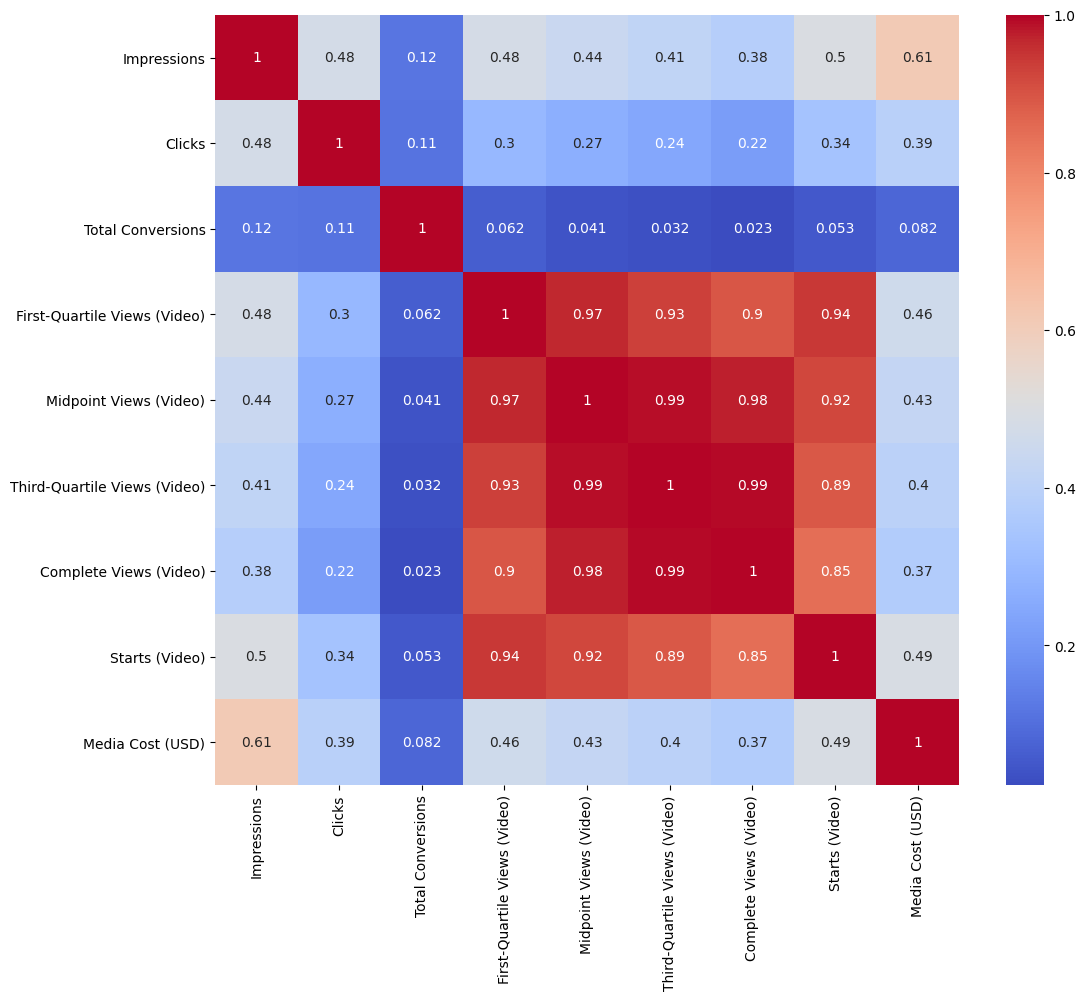

In [76]:
correlation_matrix = df.corr()

# Plot the correlation matrix heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap (Top {} Features)'.format(k))
plt.show()

## Plotting according to time 

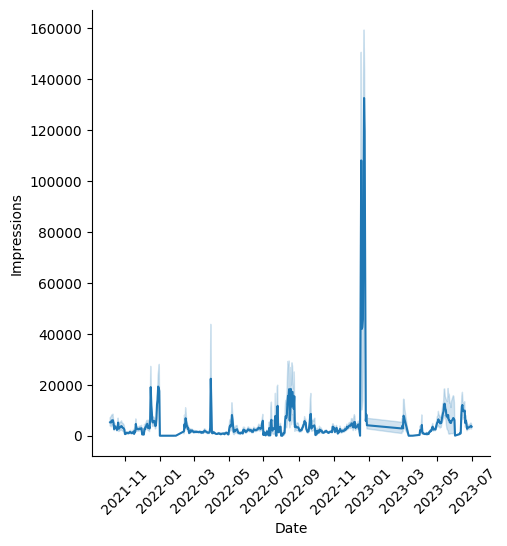

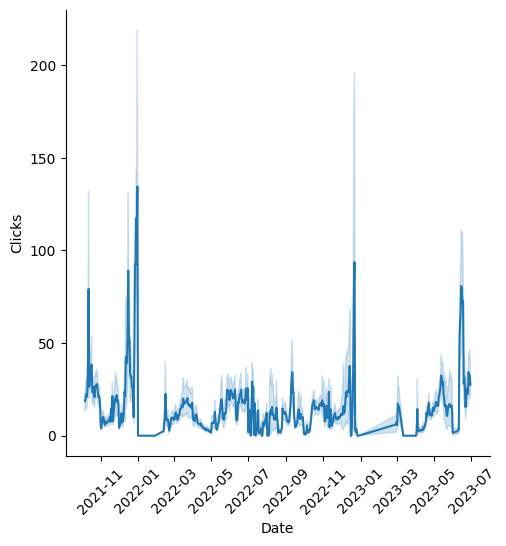

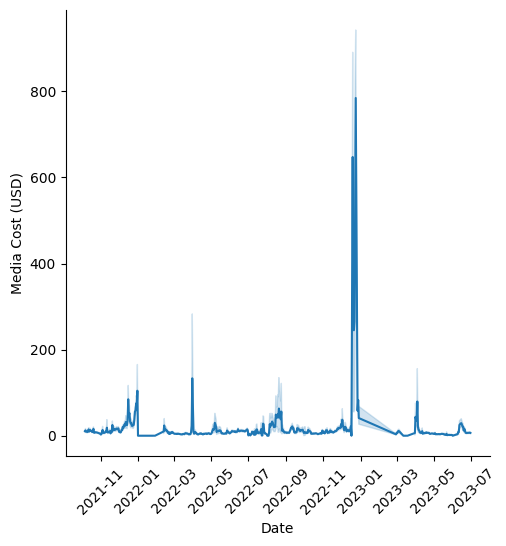

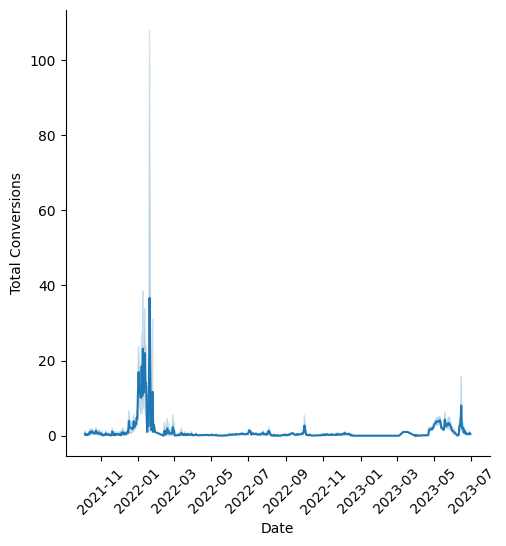

In [77]:
columns=['Impressions', 'Clicks', 'Media Cost (USD)', 'Total Conversions']
for c in columns:
    sns.relplot(x='Date', y=c, data=df, kind='line')
    plt.xticks(rotation=45)

In [78]:
#Formatting in weekly format

df=df[['Date', 'Impressions', 'Clicks', 'Total Conversions', 'Media Cost (USD)']]

# Group the data by week and calculate the sum of the ad metrics
df_weekly = df.groupby(pd.Grouper(key='Date', freq='W-SUN')).sum()

# Reset the index to get the 'week' column
df_weekly = df_weekly.reset_index()

# Rename the 'date' column to 'week'
df_weekly = df_weekly.rename(columns={'Date': 'week_end'})

# Add a 'week_number' column ranging from 1 to 52
df_weekly['week_number'] = df_weekly['week_end'].dt.week

# Display the transformed weekly dataset
df_weekly

/var/folders/p5/9npcw21d3xs054yxn9xh232h0000gn/T/ipykernel_27697/1394971593.py:15: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_weekly['week_number'] = df_weekly['week_end'].dt.week


,week_end,Impressions,Clicks,Total Conversions,Media Cost (USD),week_number
0,2021-10-10,10459995.0,39948.0,552.0,18919.684318,40
1,2021-10-17,16026688.0,170334.0,3087.0,50833.181671,41
2,2021-10-24,14717114.0,107368.0,3816.0,43027.307706,42
3,2021-10-31,13262855.0,95856.0,2879.0,27034.983168,43
4,2021-11-07,4037264.0,31818.0,1172.0,30833.036894,44
...,...,...,...,...,...,...
86,2023-06-04,2071149.0,4777.0,618.0,513.113371,22
87,2023-06-11,113765.0,384.0,20.0,891.628406,23
88,2023-06-18,4723097.0,32825.0,1500.0,11721.788836,24
89,2023-06-25,7367251.0,47122.0,1372.0,16970.397627,25


In [79]:
df_final=df_weekly.rename(columns={'Impressions':'impressions_dv360', 'Clicks':'clicks_dv360', 'Total Conversions': 'leads_dv360', 'Media Cost (USD)':'spend_dv360'})

In [80]:
df_final

,week_end,impressions_dv360,clicks_dv360,leads_dv360,spend_dv360,week_number
0,2021-10-10,10459995.0,39948.0,552.0,18919.684318,40
1,2021-10-17,16026688.0,170334.0,3087.0,50833.181671,41
2,2021-10-24,14717114.0,107368.0,3816.0,43027.307706,42
3,2021-10-31,13262855.0,95856.0,2879.0,27034.983168,43
4,2021-11-07,4037264.0,31818.0,1172.0,30833.036894,44
...,...,...,...,...,...,...
86,2023-06-04,2071149.0,4777.0,618.0,513.113371,22
87,2023-06-11,113765.0,384.0,20.0,891.628406,23
88,2023-06-18,4723097.0,32825.0,1500.0,11721.788836,24
89,2023-06-25,7367251.0,47122.0,1372.0,16970.397627,25


In [59]:
df_final.to_csv('dv360_final.csv')